In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('/Users/harishprabhala/Downloads/timeseries_users.csv')
events = pd.read_csv('/Users/harishprabhala/Downloads/timeseries_events.csv')

In [3]:
users.head()

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


In [4]:
events.head()

,user_id,event_date
0,0,2015-02-26 00:00:00
1,0,2015-03-10 00:00:00
2,0,2015-03-30 00:00:00
3,0,2015-02-15 00:00:00
4,0,2015-02-18 00:00:00


In [5]:
user_events=users.merge(events, left_on='user_id', right_on='user_id', how='outer')

In [6]:
user_events.head()

,age,gender,user_id,event_date
0,51.0,f,0,2015-02-26 00:00:00
1,51.0,f,0,2015-03-10 00:00:00
2,51.0,f,0,2015-03-30 00:00:00
3,51.0,f,0,2015-02-15 00:00:00
4,51.0,f,0,2015-02-18 00:00:00


In [11]:
male = user_events[user_events.gender == 'm']

In [12]:
male.head()

,age,gender,user_id,event_date
657,35.0,m,2,2015-03-06 00:00:00
658,35.0,m,2,2015-03-19 00:00:00
659,35.0,m,2,2015-03-15 00:00:00
660,35.0,m,2,2015-02-27 00:00:00
661,35.0,m,2,2015-02-26 00:00:00


In [14]:
male_30 = male[male.age >= 30]

In [15]:
male_30.head()

,age,gender,user_id,event_date
657,35.0,m,2,2015-03-06 00:00:00
658,35.0,m,2,2015-03-19 00:00:00
659,35.0,m,2,2015-03-15 00:00:00
660,35.0,m,2,2015-02-27 00:00:00
661,35.0,m,2,2015-02-26 00:00:00


In [24]:
male_30.groupby('user_id')['event_date'].count().sort_values(ascending=False)

user_id
84     1947
12     1705
45      758
47      473
38      391
74      349
89      278
31      271
21      254
66      224
60      208
17      147
23      129
2       126
72      123
67      100
71       95
3        65
33       51
78       41
64       17
40       10
226       0
200       0
220       0
225       0
227       0
Name: event_date, dtype: int64

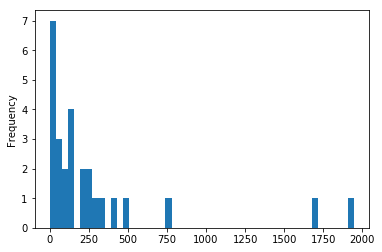

In [25]:
male_30.groupby('user_id')['event_date'].count().sort_values(ascending=False).plot(kind='hist', bins = 50)

In [68]:
def delta(time):
    initial_time=pd.to_datetime(time).sort_values().reset_index(drop=True)
    final_time=initial_time[1:].reset_index(drop=True)
    return (final_time-initial_time[:-1])

In [69]:
user_events.groupby('user_id')['event_date'].apply(delta)

user_id     
0        0     0 days
         1     1 days
         2     0 days
         3     1 days
         4     0 days
         5     0 days
         6     1 days
         7     0 days
         8     1 days
         9     0 days
         10    1 days
         11    0 days
         12    1 days
         13    1 days
         14    1 days
         15    1 days
         16    0 days
         17    1 days
         18    0 days
         19    1 days
         20    0 days
         21    1 days
         22    0 days
         23    1 days
         24    0 days
         25    1 days
         26    0 days
         27    1 days
         28    0 days
         29    1 days
                ...  
96       147   0 days
         148   1 days
         149   0 days
         150   1 days
         151   0 days
         152   1 days
         153   0 days
         154   1 days
         155   0 days
         156   1 days
         157   0 days
         158   1 days
         159   0 days
         160   1 da

In [75]:
label=events.groupby('user_id')['event_date'].apply(days)

In [80]:
time_delta=users.merge(label.to_frame(name='delta'),how='outer',left_on='user_id', right_on='user_id')

KeyError: 'user_id'